In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
file_path = "/content/drive/MyDrive/23MCA0304_Dissertation_II/Dataset/Vellore_Water_Spread_Data.csv"
df = pd.read_csv(file_path)

In [ ]:
# Convert 'Month-Year' column to datetime format
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%b-%y')
print(df.head())


  Month-Year  Current Water Spread Area  Maximum Water Spread Area
0 2012-02-01                      13.11                     183.09
1 2012-03-01                      23.76                     231.28
2 2012-04-01                      15.35                     260.57
3 2012-05-01                       1.61                     215.95
4 2012-09-01                       5.53                     232.51


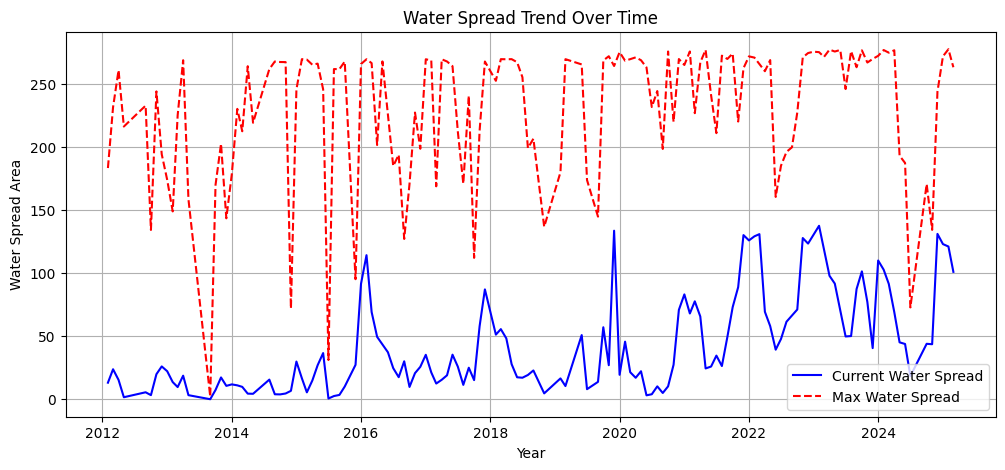

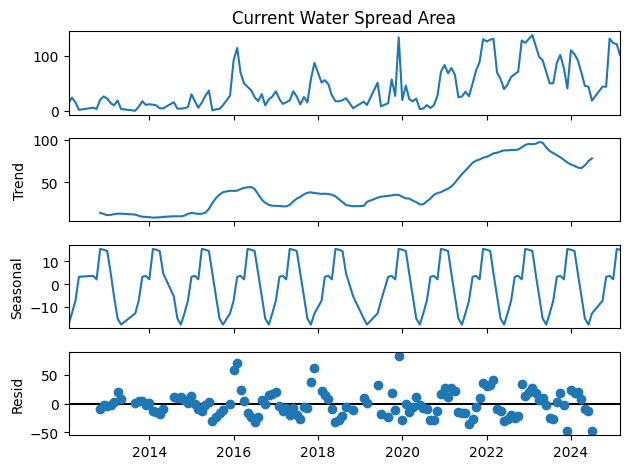

In [ ]:
# ========== STEP 3: TREND ANALYSIS ==========
plt.figure(figsize=(12, 5))
plt.plot(df['Month-Year'], df['Current Water Spread Area'], label="Current Water Spread", color='b')
plt.plot(df['Month-Year'], df['Maximum Water Spread Area'], label="Max Water Spread", color='r', linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Water Spread Area")
plt.title("Water Spread Trend Over Time")
plt.legend()
plt.grid()
plt.show()

# Seasonal decomposition
decompose_result = seasonal_decompose(df.set_index('Month-Year')['Current Water Spread Area'], model='additive', period=12)
decompose_result.plot()
plt.show()



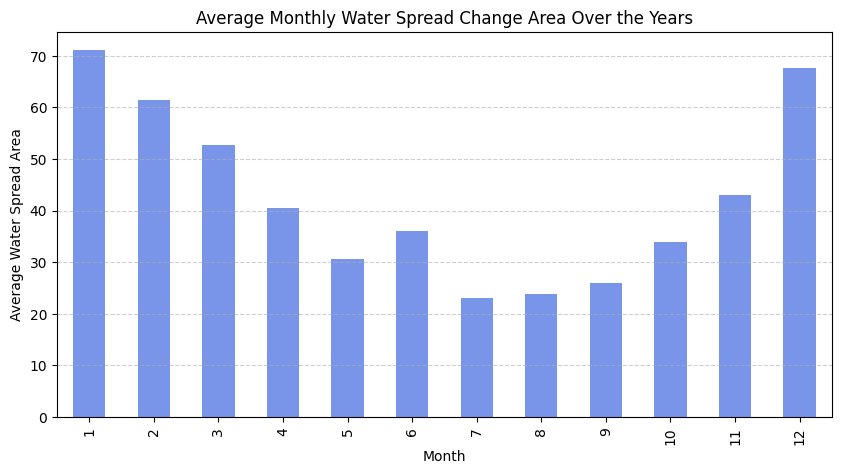

In [ ]:

# Set 'Month-Year' as index
df.set_index('Month-Year', inplace=True)

# Perform seasonal decomposition
decompose_result = seasonal_decompose(df['Current Water Spread Area'], model='additive', period=12)

# Extract seasonal component
seasonal_component = decompose_result.seasonal

# Compute average seasonal effect per month
df['Month'] = df.index.month
avg_seasonality = df.groupby('Month')['Current Water Spread Area'].mean()

# Plot the average seasonal component
plt.figure(figsize=(10, 5))
avg_seasonality.plot(kind='bar', color='royalblue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average Water Spread Area')
plt.title('Average Monthly Water Spread Change Area Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

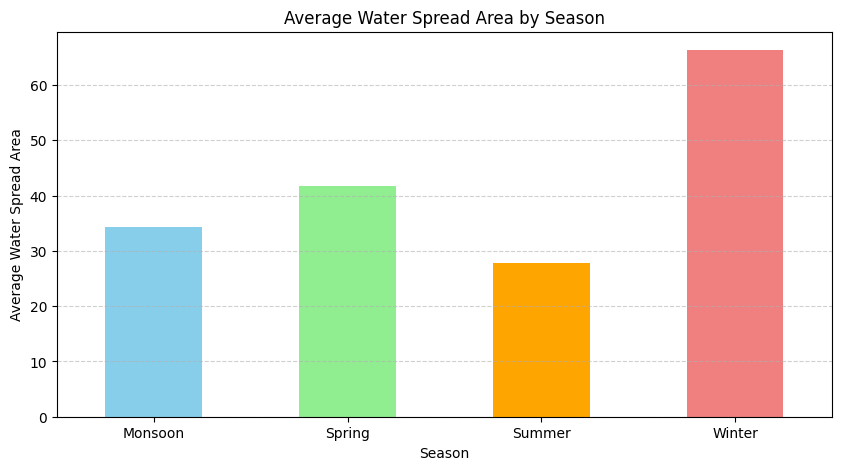

In [ ]:
df['Season'] = df['Month-Year'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Monsoon', 10: 'Monsoon', 11: 'Monsoon'
})

# Calculate Average Water Spread per Season
seasonal_avg = df.groupby('Season')['Current Water Spread Area'].mean()

# Plot the average seasonal component
plt.figure(figsize=(10, 5))
seasonal_avg.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])  # Customize colors
plt.xlabel('Season')
plt.ylabel('Average Water Spread Area')
plt.title('Average Water Spread Area by Season')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


--- Yearly Percentage Change ---
     Month-Year  Current Spread Area  Previous Water Spread  YoY Change (%)
1         2013                10.61                  26.00      -59.192308
2         2014                 6.67                  10.61      -37.134779
3         2015                27.25                   6.67      308.545727
4         2016                25.67                  27.25       -5.798165
5         2017                87.00                  25.67      238.917024
6         2018                 4.67                  87.00      -94.632184
7         2019               133.46                   4.67     2757.815846
8         2020                70.79                 133.46      -46.957890
9         2021               129.98                  70.79       83.613505
10        2022               123.26                 129.98       -5.170026
11        2023                40.50                 123.26      -67.142625
12        2024               130.94                  40.50      2

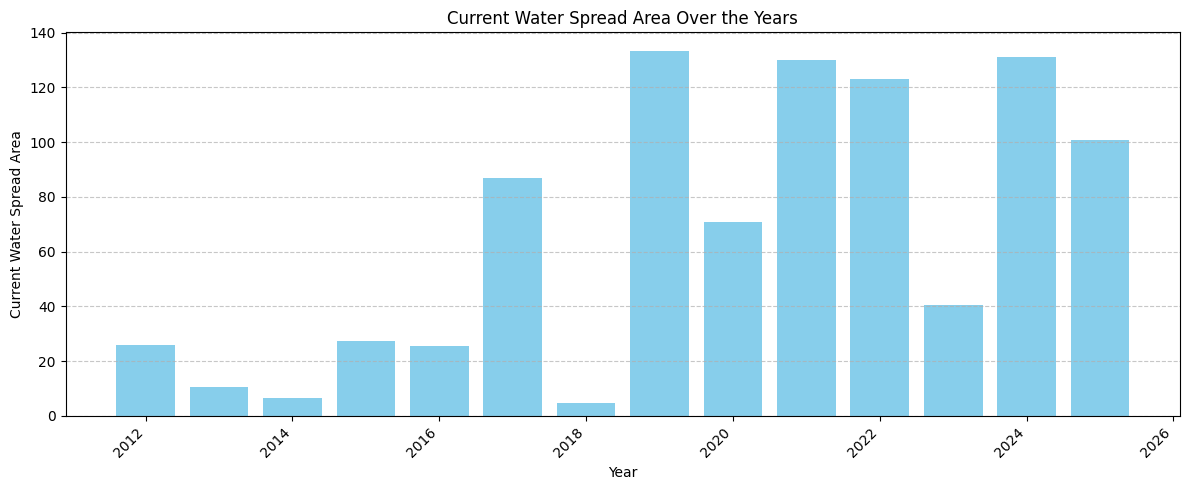

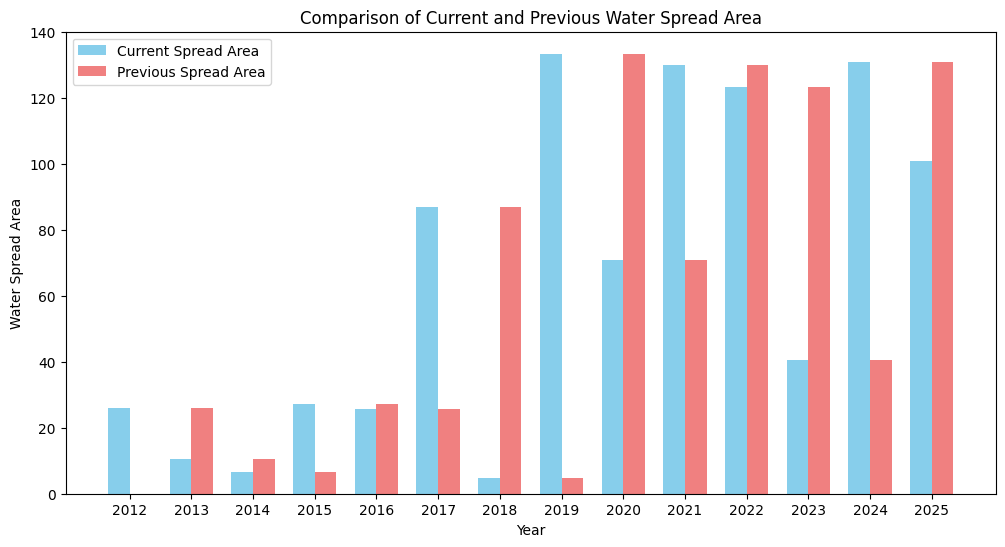

In [ ]:
# Yearly Percentage Change (YoY) - Only for year-end values

yearly_data = df.groupby(df.index.year)['Current Water Spread Area'].last().reset_index() # Get year-end values
yearly_data['Previous Water Spread'] = yearly_data['Current Water Spread Area'].shift(1)  # Add previous year's data
yearly_data['YoY Change (%)'] = yearly_data['Current Water Spread Area'].pct_change() * 100
yearly_data= yearly_data.rename(columns={'Current Water Spread Area': 'Current Spread Area'})
yearly_change = yearly_data[['Month-Year', 'Current Spread Area', 'Previous Water Spread', 'YoY Change (%)']]

# Display Results
print("\n--- Yearly Percentage Change ---\n", yearly_change[1:])

# Plot bar graph of Current Spread Area
plt.figure(figsize=(12, 5))
plt.bar(yearly_change['Month-Year'], yearly_change['Current Spread Area'], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Current Water Spread Area")
plt.title("Current Water Spread Area Over the Years")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Prepare data for grouped bar graph
years = yearly_change['Month-Year'].values
current_spread = yearly_change['Current Spread Area'].values
previous_spread = yearly_change['Previous Water Spread'].values

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
x_pos = np.arange(len(years))

# Create grouped bar graph
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x_pos - bar_width / 2, current_spread, bar_width, label='Current Spread Area', color='skyblue')
rects2 = ax.bar(x_pos + bar_width / 2, previous_spread, bar_width, label='Previous Spread Area', color='lightcoral')

# Add labels, title, and legend
ax.set_xlabel("Year")
ax.set_ylabel("Water Spread Area")
ax.set_title("Comparison of Current and Previous Water Spread Area")
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
ax.legend()

# Display the plot
plt.show()

In [ ]:
# Extract season from month
df['Season'] = df['Month-Year'].dt.month.map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                              3: 'Spring', 4: 'Spring', 5: 'Spring',
                                              6: 'Summer', 7: 'Summer', 8: 'Summer',
                                              9: 'Monsoon', 10: 'Monsoon', 11: 'Monsoon'})

# Calculate Average Water Spread per Season
seasonal_avg = df.groupby('Season')['Current Water Spread Area'].mean()

# Calculate Percentage Contribution of Each Season
seasonal_percent = (seasonal_avg / seasonal_avg.sum()) * 100
print(seasonal_percent)

Season
Monsoon    20.146911
Spring     24.575368
Summer     16.295417
Winter     38.982305
Name: Current Water Spread Area, dtype: float64



--- Correlation Matrix ---
                            Current Water Spread Area  \
Current Water Spread Area                   1.000000   
Maximum Water Spread Area                   0.415892   

                           Maximum Water Spread Area  
Current Water Spread Area                   0.415892  
Maximum Water Spread Area                   1.000000  


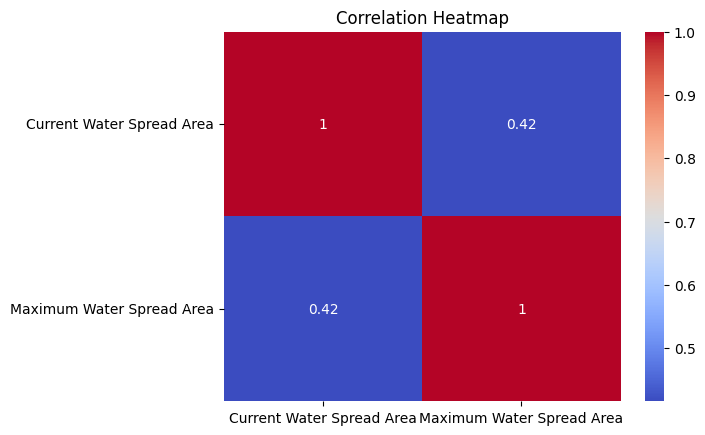

In [ ]:
# ========== STEP 4: CORRELATION ANALYSIS ==========
correlation = df[['Current Water Spread Area', 'Maximum Water Spread Area']].corr()
print("\n--- Correlation Matrix ---\n", correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
# Compute overall percentage change
initial_value = df['Current Water Spread Area'].iloc[0]
final_value = df['Current Water Spread Area'].iloc[-1]

overall_change = ((final_value - initial_value) / initial_value) * 100
print(f"Overall Water Spread Change: {overall_change:.2f}%")

Overall Water Spread Change: 669.34%
